# Data Pipeline 구축

## OSEMN

### case

* 대규모 통신 회사의 고객이 이탈하는 이유를 알고 싶음
* 고객 이탈을 줄이기 위한 계획을 세울 예정으로 고객 이탈의 원인을 찾는 작업 필요
* 고객 이탈을 예측할 수 있는 기계 학습 모델 구축

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import statsmodels.api as sm  # import the statsmodel package  
from sklearn.linear_model import LogisticRegression # import logstic regression 

## Obtaining Data

In [2]:
# read data

data = pd.read_csv('data/customer_churn_sample_data.csv')
data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [3]:
# number of rows and columns

data.shape

(10000, 12)

In [4]:
# dtypes of columns

data.dtypes

CustomerId           int64
CredRate             int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
Prod Number          int64
HasCrCard            int64
ActMem               int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Scrubbing Data

In [5]:
# explore the data

data.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# check the missing values

data.isnull().values.any()

True

In [7]:
data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary     True
Exited             False
dtype: bool

In [8]:
# total number of missing values

data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [9]:
# percentage of missing values

round(data.isnull().sum()/len(data)*100, 2)

CustomerId         0.00
CredRate           0.00
Geography          0.00
Gender             0.04
Age                0.06
Tenure             0.00
Balance            0.00
Prod Number        0.00
HasCrCard          0.00
ActMem             0.00
EstimatedSalary    0.04
Exited             0.00
dtype: float64

In [10]:
# datatypes of the missing columns

data[['Gender', 'Age', 'EstimatedSalary']].dtypes

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

In [11]:
# explore the data in Age and EstimatedSalary columns

data[['Age', 'EstimatedSalary']].describe()

,Age,EstimatedSalary
count,9994.000000,9996.000000
mean,38.925255,100074.744083
std,10.489248,57515.774555
min,18.000000,11.580000
25%,32.000000,50974.077500
50%,37.000000,100168.240000
75%,44.000000,149388.247500
max,92.000000,199992.480000


In [12]:
# missing values with the mean of the data in that column

mean_value = data['EstimatedSalary'].mean()
mean_value

100074.74408263284

In [13]:
# filling data with the mean of the data

data['EstimatedSalary'] = data['EstimatedSalary'].fillna(mean_value)

In [14]:
# check the total number of missing values

data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
# check the count of Male and Female in Gender

data['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

In [16]:
# missing values with the most frequently data in that column

frequently_value = data['Gender'].value_counts().idxmax()
frequently_value

'Male'

In [17]:
# to replace the missing values with the gender that occurs most frequently

data['Gender'] = data['Gender'].fillna(frequently_value)

In [18]:
# check the total number of missing values

data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
# missing values with the mode of the data in that column

mode_value = data['Age'].mode()
mode_value

0    37.0
dtype: float64

In [20]:
# replaces the missing values with the mode of the values in the column

data['Age'] = data['Age'].fillna(mode_value[0])

In [21]:
# check the total number of missing values

data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
# check missing values

data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

In [23]:
# check the count of 0 and 1 in HasCrCard

data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [24]:
# rename the columns

data = data.rename(columns={'CredRate' : 'CreditScore',
                           'ActMem' : 'IsActiveMember',
                           'Prod Number' : 'NumOfProducts',
                           'Exited' : 'Churn'})
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [25]:
# drop the CustomerId column

data.drop(labels=['CustomerId'], axis=1, inplace=True)

In [26]:
# check the columns

data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

In [27]:
# move the churn column to the right

column_churn = data['Churn']
data.drop(labels=['Churn'], axis=1, inplace=True)
data.insert(len(data.columns), 'Churn', column_churn.values)

In [28]:
# check the data

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [29]:
# change the datatype of the Geography, Gender, HasCrCard, Churn, IsActiveMember columns to 'category'

data['Geography'] = data['Geography'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['HasCrCard'] = data['HasCrCard'].astype('category')
data['Churn'] = data['Churn'].astype('category')
data['IsActiveMember'] = data['IsActiveMember'].astype('category')

In [30]:
# check th datatypes

data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

## Exploring Data

In [31]:
# inspect the target variable

data['Churn'].value_counts(0)

0    7963
1    2037
Name: Churn, dtype: int64

In [32]:
# inspect the percentage of the customers who left the bank

data['Churn'].value_counts(1)*100

0    79.63
1    20.37
Name: Churn, dtype: float64

In [33]:
# inspect the percentage of the customers who have a credit card

data['IsActiveMember'].value_counts(1)*100

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

In [34]:
# statistical overview

data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.924100,5.012800,76485.889288,1.530200,100074.744083
std,96.653299,10.486207,2.892174,62397.405202,0.581654,57504.269099
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100134.325000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149382.097500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [35]:
# inspect the mean attributes of customers who churned

summary_churn = data.groupby('Churn')
summary_churn.mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,651.853196,37.411277,5.033279,72745.296779,1.544267,99718.932023
1,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


In [36]:
# median attributes of the customers

summary_churn.median()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,653,36.0,5,92072.68,2,99645.04
1,646,45.0,5,109349.29,1,102460.84


In [37]:
# check the correlation between parameters

corr = data.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001352
Age,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.007215
Tenure,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.007407
Balance,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013129
NumOfProducts,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.014132
EstimatedSalary,-0.001352,-0.007215,0.007407,0.013129,0.014132,1.000000


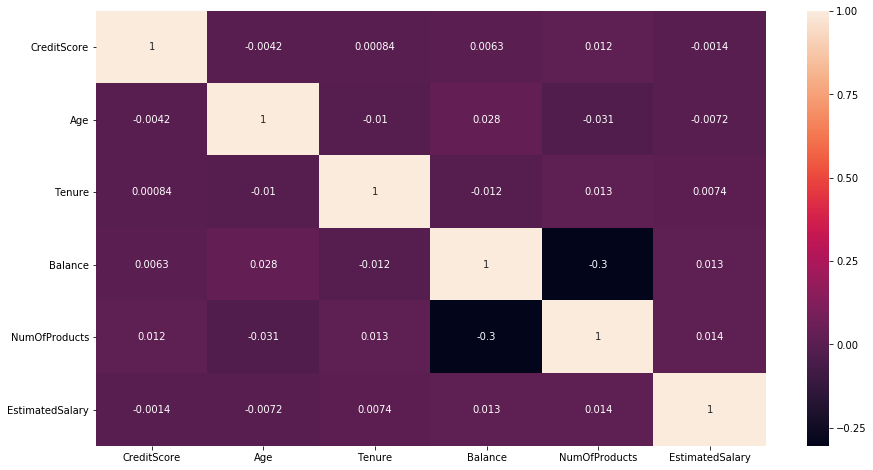

In [38]:
# plotting the correlation plot w/seaborn

plt.figure(figsize=(15, 8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

__Exploratory Data Analysis(EDA)__

Text(0, 0.5, 'Numbers of Customers')

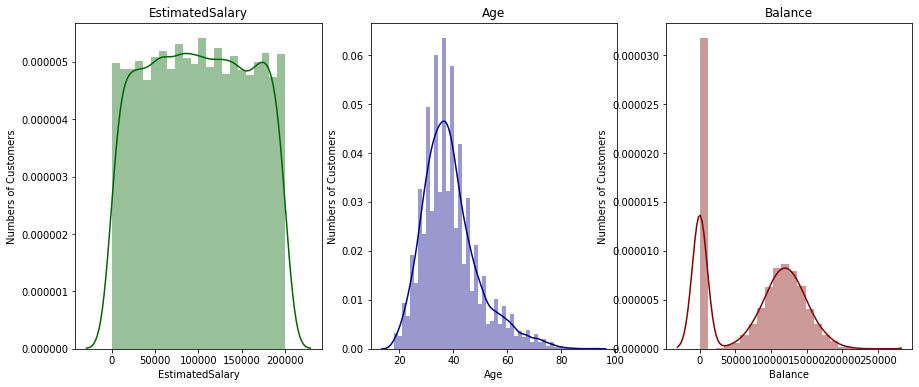

In [39]:
# plotting the distribution graph of the customers for the EstimatedSalary, Age,Balance variables

f, axes = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(data.EstimatedSalary, kde=True, color="darkgreen", ax=axes[0]).set_title('EstimatedSalary')
axes[0].set_ylabel('Numbers of Customers')

sns.distplot(data.Age, kde=True, color="darkblue", ax=axes[1]).set_title('Age')
axes[1].set_ylabel('Numbers of Customers')

sns.distplot(data.Balance, kde=True, color="maroon", ax=axes[2]).set_title('Balance')
axes[2].set_ylabel('Numbers of Customers')

__bivariate analysis__

Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

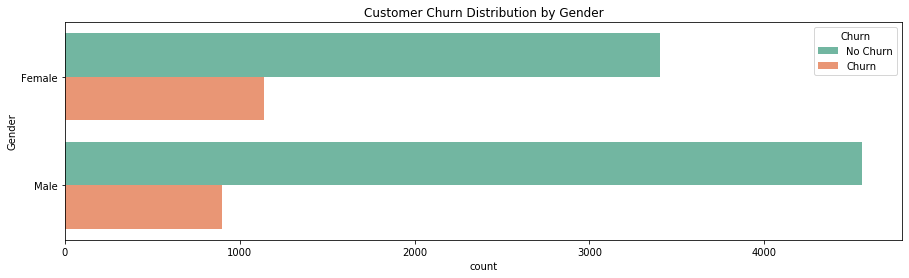

In [40]:
# inspect whether there is a difference in churn for gender w/ bivariate analysis

plt.figure(figsize=(15, 4))
p = sns.countplot(y="Gender", hue='Churn', data=data, palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Gender')

Text(0.5, 1.0, 'Customer Geography Distribution')

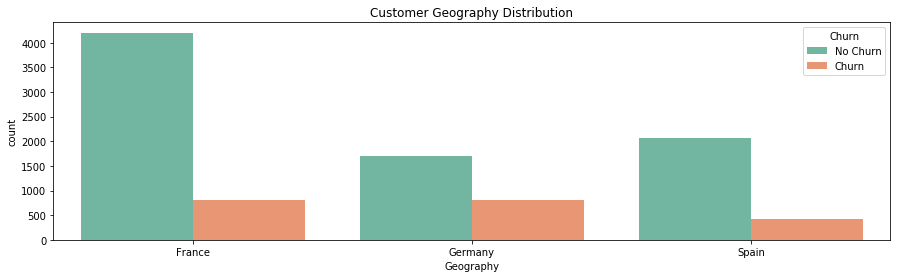

In [41]:
# plotting Geography Vs Churn

plt.figure(figsize=(15, 4))
p = sns.countplot(x='Geography', hue='Churn', data=data, palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Geography Distribution')

Text(0.5, 1.0, 'Customer Distribution by Product')

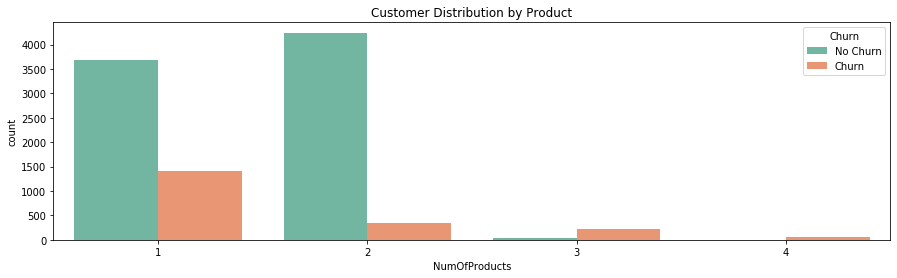

In [42]:
# plot NumOfProducts Vs Churn

plt.figure(figsize=(15, 4))
p = sns.countplot(x='NumOfProducts', hue='Churn', data=data, palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Distribution by Product')

Text(0.5, 1.0, 'Customer Age - churn vs no churn')

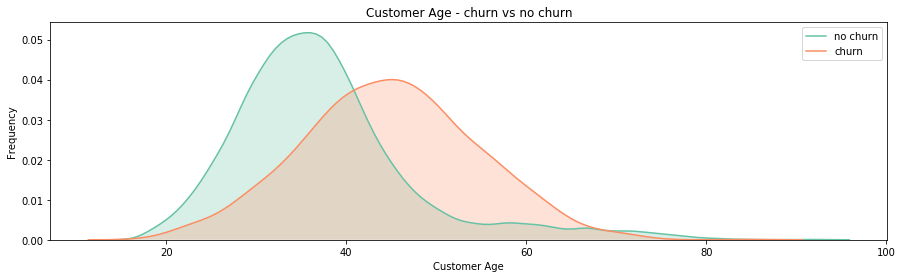

In [43]:
# plotting distribution of customer age: Churn vs nochurn 

plt.figure(figsize=(15, 4))
ax = sns.kdeplot(data.loc[(data['Churn'] == 0),'Age'] , color=sns.color_palette("Set2")[0], shade=True, label='no churn')
ax = sns.kdeplot(data.loc[(data['Churn'] == 1),'Age'] , color=sns.color_palette("Set2")[1], shade=True, label='churn')
ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Age - churn vs no churn')

Text(0.5, 1.0, 'Customer Balance - churn vs no churn')

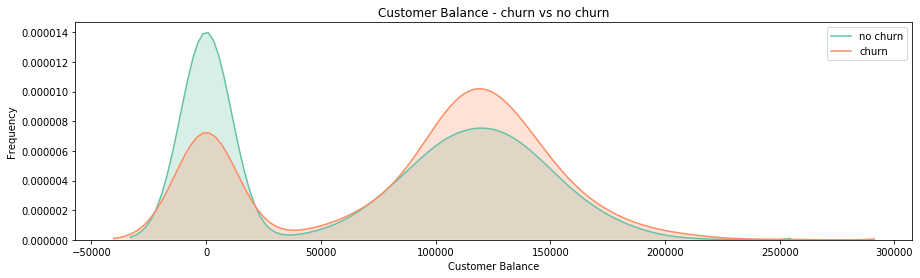

In [44]:
# plotting Balance Vs Churn

plt.figure(figsize=(15, 4))
ax = sns.kdeplot(data.loc[(data['Churn'] == 0),'Balance'] , color=sns.color_palette("Set2")[0], shade=True, label='no churn')
ax = sns.kdeplot(data.loc[(data['Churn'] == 1),'Balance'] , color=sns.color_palette("Set2")[1], shade=True, label='churn')
ax.set(xlabel='Customer Balance', ylabel='Frequency')
plt.title('Customer Balance - churn vs no churn')

Text(0.5, 1.0, 'Customer CreditScore - churn vs no churn')

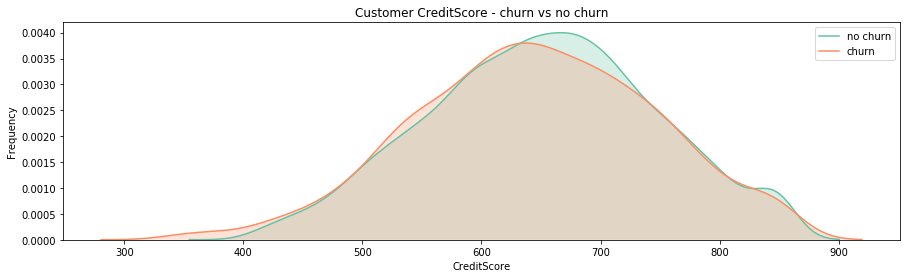

In [45]:
# plotting CreditScore Vs Churn

plt.figure(figsize=(15, 4))
ax = sns.kdeplot(data.loc[(data['Churn'] == 0),'CreditScore'] , color=sns.color_palette("Set2")[0], shade=True, label='no churn')
ax = sns.kdeplot(data.loc[(data['Churn'] == 1),'CreditScore'] , color=sns.color_palette("Set2")[1], shade=True, label='churn')
ax.set(xlabel='CreditScore', ylabel='Frequency')
plt.title('Customer CreditScore - churn vs no churn')

Text(0.5, 1.0, 'Number of Product VS Balance')

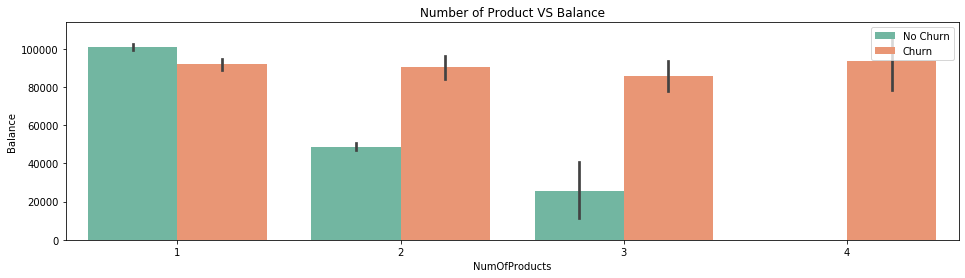

In [46]:
# plotting Balance Vs NumOfProducts by Churn

plt.figure(figsize=(16, 4))
p = sns.barplot(x='NumOfProducts', y='Balance', hue='Churn', data=data, palette="Set2")
p.legend(loc='upper right')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Number of Product VS Balance')

## Modeling Data

In [47]:
# check the datatypes

data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

In [48]:
# encode of the categorical variable

data['Geography'] = data['Geography'].astype('category').cat.codes
data['Gender'] = data['Gender'].astype('category').cat.codes

In [49]:
# check the datatypes

data.dtypes

CreditScore           int64
Geography              int8
Gender                 int8
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

In [50]:
# split the data into training and testing sets

target = 'Churn'
X = data.drop('Churn', axis=1)
y = data[target]

In [51]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10


In [52]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Churn, dtype: category
Categories (2, int64): [0, 1]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)

In [54]:
X_train.shape

(8500, 10)

In [55]:
X_test.shape

(1500, 10)

In [56]:
# Feature selection

forest = RandomForestClassifier(n_estimators=500, random_state=1)

In [57]:
# fit the model w/the random forest classifier

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [58]:
# call random forest feature_importances_ attributes

importances = forest.feature_importances_
importances

array([0.14388638, 0.03854849, 0.01929862, 0.24195424, 0.08150331,
       0.14176029, 0.12846081, 0.01913874, 0.03887781, 0.14657132])

In [59]:
# create a variable, features

features = data.drop(['Churn'], axis=1).columns
indices = np.argsort(importances)[::-1]

In [60]:
features

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [61]:
indices

array([3, 9, 0, 5, 6, 4, 8, 1, 2, 7], dtype=int64)

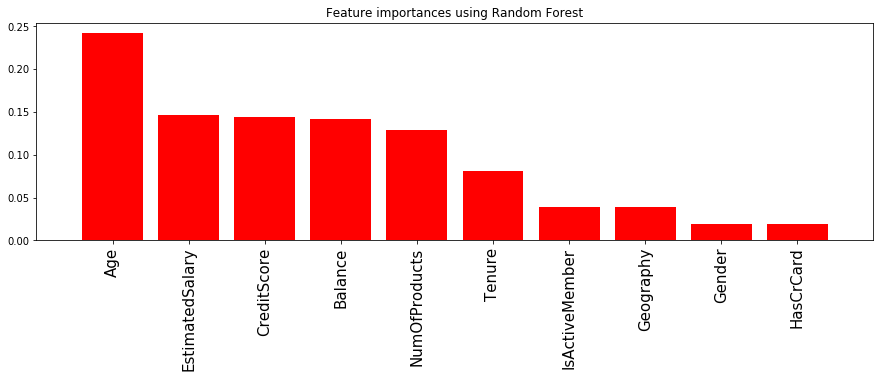

In [62]:
# plotting the important features

plt.figure(figsize=(15, 4))
plt.title('Feature importances using Random Forest')
plt.bar(range(X_train.shape[1]), importances[indices], color='r', align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical', fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [63]:
# model building
# select top 5 features

top5_features = ['Age', 'EstimatedSalary', 'CreditScore', 'Balance', 'NumOfProducts']
logReg = sm.Logit(y_train, X_train[top5_features])
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.472882
         Iterations 6


In [64]:
# summary of parameters

logistic_regression.summary
logistic_regression.params

Age                0.048335
EstimatedSalary   -0.000001
CreditScore       -0.004470
Balance            0.000003
NumOfProducts     -0.361678
dtype: float64

In [65]:
# coefficients

coef = logistic_regression.params
coef

Age                0.048335
EstimatedSalary   -0.000001
CreditScore       -0.004470
Balance            0.000003
NumOfProducts     -0.361678
dtype: float64

In [66]:
# define calculating function

def y(coef, Age, EstimatedSalary, CreditScore, Balance, NumOfProducts):
    return coef[0]*Age + coef[1]*EstimatedSalary + coef[2]*CreditScore + coef[3]*Balance + coef[4]*NumOfProducts

In [67]:
# case of Age:50, EstimatedSalary:100,000, CreditScore:600, Balance:100,000, NumOfProducts:2

y1 = y(coef, 50, 100000, 600, 100000, 2)
y1

-0.8030915157551665

In [68]:
p = np.exp(y1) / (1+np.exp(y1))    # log값이므로
p

0.3093646023640836

In [69]:
# logistic regression model on the partitioned training data

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train[top5_features], y_train)

In [70]:
# predict on the test data

clf.predict(X_test[top5_features])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
# predict_proba on the test data

clf.predict_proba(X_test[top5_features])

array([[0.61565033, 0.38434967],
       [0.76717157, 0.23282843],
       [0.78137389, 0.21862611],
       ...,
       [0.552548  , 0.447452  ],
       [0.85311964, 0.14688036],
       [0.75851722, 0.24148278]])

In [72]:
# accuracy

clf.score(X_test[top5_features], y_test)

0.79

## iNterpreting Data

* churn number : churned is 20.37% (2,037),no-churn out is 79.63% (7,963)
* Credit Score : the average credit score of churned customer is 645.35
* Age : the average age of churned customers is 44.83 Yrs
* Balance : The average balance of churned customers is 911,108.53
* Salary : the estimated salary of churned customers is 101,465.67
* Correlation 
    * Age of customer and churn are 29% positively correlated
    * Balance and churn are 12% positively correlated
    * Number of products and Balance are 30% negatively correlated
    * 35-45 age group seem to churn more
* The most important features, top5 features are Age, EstimatedSalary, CreditScore, Balance, NumOfProducts.